[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Batch_Stochastic_training.ipynb)

In [0]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.python.framework import ops
ops.reset_default_graph()
import warnings
warnings.filterwarnings('ignore')

sess= tf.Session()

C:\Users\ezarpkm\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [0]:
#data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)


x_data = tf.placeholder(shape = [1], dtype = tf.float32)
y_target = tf.placeholder(shape = [1], dtype = tf.float32)


#creating a variable

A = tf.Variable(tf.random_normal(shape = [1]))

#adding operation

out = tf.multiply(x_data, A)

#loss function calculation

l2_loss = tf.square(out - y_target)

In [0]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(l2_loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
loss_stochastic = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(l2_loss, feed_dict={x_data: rand_x, y_target: rand_y})
        
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)
        

Step #5 A = [9.700568]
Loss = [0.28679043]
Step #10 A = [9.83091]
Loss = [0.3545396]
Step #15 A = [9.881208]
Loss = [0.7911214]
Step #20 A = [9.956696]
Loss = [2.81026]
Step #25 A = [9.875797]
Loss = [0.26811323]
Step #30 A = [9.918067]
Loss = [0.6764831]
Step #35 A = [9.973673]
Loss = [0.71374506]
Step #40 A = [9.966955]
Loss = [0.3759139]
Step #45 A = [9.881361]
Loss = [0.3594559]
Step #50 A = [9.954575]
Loss = [0.02071103]
Step #55 A = [9.919907]
Loss = [1.202606]
Step #60 A = [9.96219]
Loss = [1.7218628]
Step #65 A = [9.947964]
Loss = [0.6928855]
Step #70 A = [10.128842]
Loss = [1.6972461]
Step #75 A = [9.941806]
Loss = [0.63300353]
Step #80 A = [9.9746685]
Loss = [0.55780774]
Step #85 A = [10.020423]
Loss = [1.6210481]
Step #90 A = [10.099862]
Loss = [1.7517246]
Step #95 A = [9.930061]
Loss = [0.88365656]
Step #100 A = [9.8804]
Loss = [0.12965332]


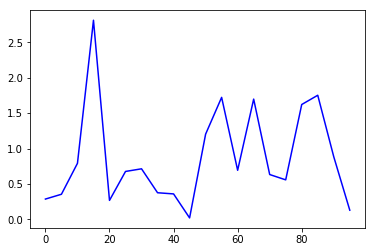

In [0]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')

In [0]:
ops.reset_default_graph()

sess = tf.Session()
batch_size = 25

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [0]:
A= tf.Variable(tf.random_normal(shape = [1,1]))

output = tf.matmul(x_data, A)

In [0]:
loss = tf.reduce_mean(tf.square(output - y_target))
init = tf.global_variables_initializer()
sess.run(init)

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [0]:

loss_batch = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[1.4085385]]
Loss = 73.59806
Step #10 A = [[2.99924]]
Loss = 49.78339
Step #15 A = [[4.2830935]]
Loss = 34.75342
Step #20 A = [[5.329311]]
Loss = 20.618296
Step #25 A = [[6.176358]]
Loss = 14.256062
Step #30 A = [[6.876156]]
Loss = 9.841668
Step #35 A = [[7.4124985]]
Loss = 6.608699
Step #40 A = [[7.8637185]]
Loss = 3.8899658
Step #45 A = [[8.233917]]
Loss = 4.0464845
Step #50 A = [[8.547974]]
Loss = 3.2409012
Step #55 A = [[8.78703]]
Loss = 2.4069793
Step #60 A = [[8.98773]]
Loss = 1.8154564
Step #65 A = [[9.137084]]
Loss = 1.1114177
Step #70 A = [[9.251649]]
Loss = 1.0044312
Step #75 A = [[9.366985]]
Loss = 1.2088118
Step #80 A = [[9.427282]]
Loss = 1.011327
Step #85 A = [[9.502225]]
Loss = 0.6899825
Step #90 A = [[9.567043]]
Loss = 1.3369613
Step #95 A = [[9.607678]]
Loss = 1.2103543
Step #100 A = [[9.638785]]
Loss = 1.395734


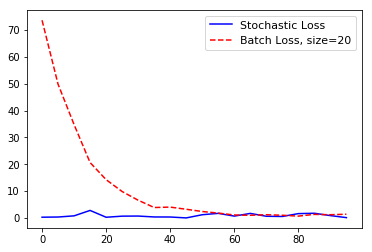

In [0]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()